In [63]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import initializers

import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [64]:
df1 = pd.read_csv("bef_data_1.csv")
df2 = pd.read_csv("bef_data_2.csv")
df3 = pd.read_csv("bef_data_3.csv")
df4 = pd.read_csv("bef_data_4.csv")
df5 = pd.read_csv("bef_data_5.csv")

#df1 = df1.set_index('time')
#df1.columns = ['Temp1', 'Temp2', 'Temp3', 'Temp4', 'Temp5', 'Temp6', 'Temp7', 'Temp8', 'Temp9', 'Temp10']
#df1

In [65]:
def shaper(arr, n_time = 1):
    arr = arr.values.tolist()
    shape_list = []
    for i in range(0, len(arr) - n_time, 1):
        time_list = []
        for j in range(n_time):
            time_list +=arr[i + j]
        shape_list.append(time_list)
        
    columns = []
    for i in range((-n_time)+1,1,1):
        columns += ["Temp1_" + str(i), 
                    "Temp2_" + str(i), 
                    "Temp3_" + str(i), 
                    "Temp4_" + str(i), 
                    "Temp5_" + str(i), 
                    "Temp6_" + str(i), 
                    "Temp7_" + str(i), 
                    "Temp8_" + str(i), 
                    "Temp9_" + str(i), 
                    "Temp10_" + str(i),
                    #'cond1_off_' + str(i),
                    #'c1_16h_' + str(i), 
                    #'c1_16l_' + str(i), 
                    #'c1_23h_' + str(i), 
                    #'c1_23l_' + str(i), 
                    #'c1_30h_' + str(i), 
                    #'c1_30l_' + str(i), 
                    #'cond2_off_' + str(i), 
                    #'c2_16h_' + str(i), 
                    #'c2_16l_' + str(i), 
                    #'c2_23h_' + str(i), 
                    #'c2_23l_' + str(i), 
                    #'c2_30h_' + str(i), 
                    #'c2_30l_' + str(i)
                   ]
    
    td = pd.DataFrame(shape_list, columns = columns)
    return td

def union_shaper(df_list, n_time = 1):
    frames = []
    for i in range(len(df_list)):
        df = pd.DataFrame(df_list[i], columns = ["time", "Temp1","Temp2", "Temp3", "Temp4", "Temp5", "Temp6", "Temp7", "Temp8", "Temp9", "Temp10"])
        df = df.set_index('time')
        df.columns = ['Temp1', 'Temp2', 'Temp3', 'Temp4', 'Temp5', 'Temp6', 'Temp7', 'Temp8', 'Temp9', 'Temp10']
        df = shaper(df, n_time)
        
        df['Temp1+1'] = df['Temp1_0'].shift(-1)
        df['Temp2+1'] = df['Temp2_0'].shift(-1)
        df['Temp3+1'] = df['Temp3_0'].shift(-1)
        df['Temp4+1'] = df['Temp4_0'].shift(-1)
        df['Temp5+1'] = df['Temp5_0'].shift(-1)
        df['Temp6+1'] = df['Temp6_0'].shift(-1)
        df['Temp7+1'] = df['Temp7_0'].shift(-1)
        df['Temp8+1'] = df['Temp8_0'].shift(-1)
        df['Temp9+1'] = df['Temp9_0'].shift(-1)
        df['Temp10+1'] = df['Temp10_0'].shift(-1)

        df['Temp1+1'].fillna(24, inplace=True)
        df['Temp2+1'].fillna(24, inplace=True)
        df['Temp3+1'].fillna(24, inplace=True)
        df['Temp4+1'].fillna(24, inplace=True)
        df['Temp5+1'].fillna(24, inplace=True)
        df['Temp6+1'].fillna(24, inplace=True)
        df['Temp7+1'].fillna(24, inplace=True)
        df['Temp8+1'].fillna(24, inplace=True)
        df['Temp9+1'].fillna(24, inplace=True)
        df['Temp10+1'].fillna(24, inplace=True)
        frames.append(df)
    return pd.concat(frames, ignore_index=True)

In [67]:
N_TIME = 60
df = union_shaper([df1, df2, df3, df4, df5], N_TIME)
df

,Temp1_-59,Temp2_-59,Temp3_-59,Temp4_-59,Temp5_-59,Temp6_-59,Temp7_-59,Temp8_-59,Temp9_-59,Temp10_-59,...,Temp1+1,Temp2+1,Temp3+1,Temp4+1,Temp5+1,Temp6+1,Temp7+1,Temp8+1,Temp9+1,Temp10+1
0,28,27,27,27,28,27,27,28,27,27,...,25.0,25.0,25.0,25.0,26.0,25.0,25.0,26.0,26.0,26.0
1,27,27,27,27,28,27,27,28,27,27,...,25.0,25.0,25.0,25.0,26.0,25.0,25.0,26.0,25.0,25.0
2,27,27,27,27,27,26,26,27,27,27,...,25.0,25.0,25.0,25.0,26.0,25.0,25.0,26.0,25.0,25.0
3,27,26,26,27,27,26,26,27,27,27,...,25.0,25.0,25.0,25.0,26.0,25.0,25.0,26.0,25.0,25.0
4,27,26,26,26,27,26,26,27,27,27,...,25.0,24.0,24.0,24.0,25.0,24.0,24.0,25.0,25.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,27,27,27,27,28,27,27,28,28,28,...,25.0,24.0,24.0,24.0,25.0,24.0,24.0,25.0,25.0,25.0
702,27,26,26,27,27,26,27,27,27,27,...,25.0,24.0,24.0,25.0,25.0,24.0,25.0,25.0,25.0,25.0
703,27,26,26,26,27,26,27,27,27,27,...,25.0,24.0,25.0,25.0,25.0,24.0,25.0,25.0,25.0,25.0
704,27,26,26,26,27,26,26,27,26,27,...,25.0,24.0,25.0,25.0,26.0,25.0,25.0,25.0,25.0,25.0


In [68]:
x = df.drop(['Temp1+1', 'Temp2+1', 'Temp3+1', 'Temp4+1', 'Temp5+1', 'Temp6+1', 'Temp7+1', 'Temp8+1', 'Temp9+1', 'Temp10+1'], axis = 1)
y = df[['Temp1+1', 'Temp2+1', 'Temp3+1', 'Temp4+1', 'Temp5+1', 'Temp6+1', 'Temp7+1', 'Temp8+1', 'Temp9+1', 'Temp10+1']]

y=np.reshape(y.values, (-1,10))

scaler_x = MinMaxScaler()
print(scaler_x.fit(x))
scaler_y = MinMaxScaler()
print(scaler_y.fit(y))

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


# Variants

In [69]:
X_div = scaler_x.transform(x)
y_div = scaler_y.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_div, y_div, test_size = 0.2)

xscale=scaler_x.transform(x)
yscale=scaler_y.transform(y)

X_train, X_test, y_train, y_test = train_test_split(xscale, yscale, train_size = 1)

# Neural Link

In [70]:
len(X_train)

564

In [123]:
model = Sequential()
model.add(Dense(2048, input_dim=10 * N_TIME, kernel_initializer=initializers.RandomNormal(stddev=0.01), activation='relu'))
model.add(Dense(3072, activation='relu'))
model.add(Dense(10, activation='linear'))
model.summary()
# Use a custom metricfunction

model.compile(loss='mse', optimizer='adam', metrics = ['accuracy'])

fit = model.fit(X_train, y_train, epochs=50,  verbose=1, validation_split=0.5)

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 2048)              1230848   
_________________________________________________________________
dense_73 (Dense)             (None, 3072)              6294528   
_________________________________________________________________
dense_74 (Dense)             (None, 10)                30730     
Total params: 7,556,106
Trainable params: 7,556,106
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
9/9 [==============================] - 1s 68ms/step - loss: 0.6670 - accuracy: 0.1348 - val_loss: 0.0349 - val_accuracy: 0.1489
Epoch 2/50
9/9 [==============================] - 1s 63ms/step - loss: 0.0301 - accuracy: 0.2057 - val_loss: 0.0211 - val_accuracy: 0.5071
Epoch 3/50
9/9 [==============================] - 1s 62ms/step - loss: 0.0201 - accuracy: 0.492

In [124]:
scores = model.evaluate(X_test, y_test, verbose=1)
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

5/5 [==============================] - 0s 6ms/step - loss: 0.0054 - accuracy: 0.5915
Доля верных ответов на тестовых данных, в процентах: 59.1549


In [125]:
def pred_plot(x, y, p, index):
    mpl.rcParams['figure.figsize'] = (4, 3)
    mpl.rcParams['axes.grid'] = False
    
    history = np.transpose(np.reshape(x[index], (-1, 10)))
    
    length = history.shape[1]
    #np.reshape(X, (-1, 10))[-1].tolist()
    
    real = np.transpose(np.array(y[index]))
    
    pred = np.transpose(np.array(p[index]))
    
    for i in range(10):
        percent = (history[i].max() - history[i].min())
        result = (percent-abs(real[i] - pred[i]))/percent
        
        plt.plot(range(length), history[i], label='History')
        plt.plot(length, real[i], 'bo', label='Real')
        plt.plot(length, pred[i], 'rx', label='Predicted')
        plt.xlabel('Time')
        plt.ylabel('Temperature value')
        plt.legend(loc='upper left')
        plt.title('index: ' + str(index) + ', temp: ' + str(i+1) + '\npercent: ' + str(result*100))
        plt.show()  

In [126]:
scaler_x.inverse_transform(X_test[:2])

array([[25., 25., 25., ..., 24., 24., 24.],
       [26., 25., 26., ..., 25., 25., 25.]])

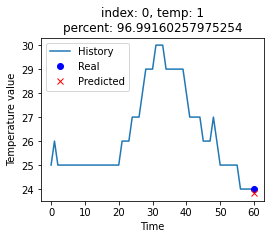

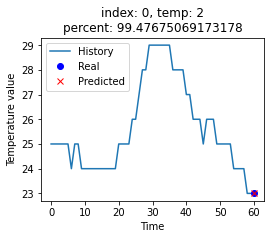

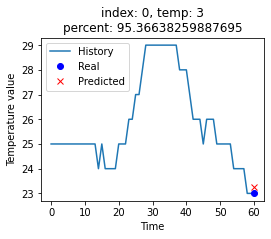

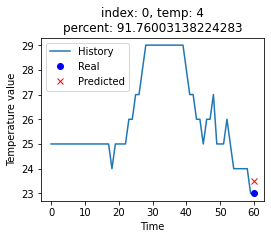

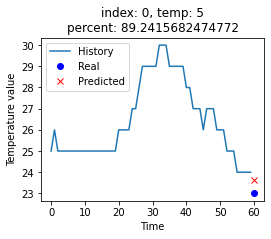

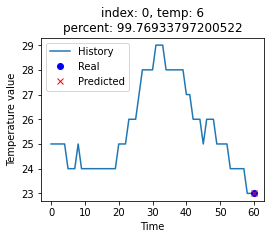

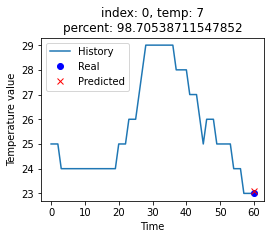

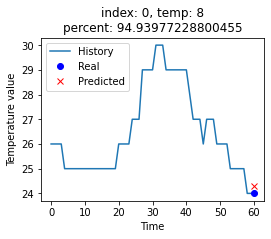

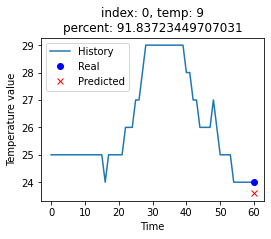

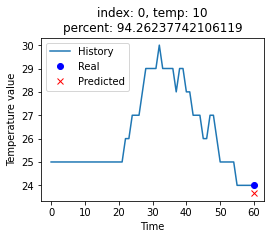

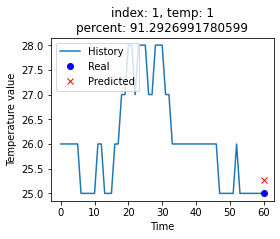

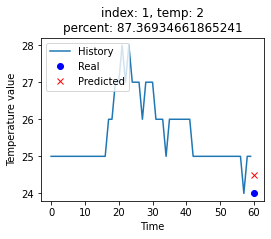

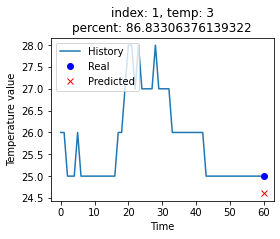

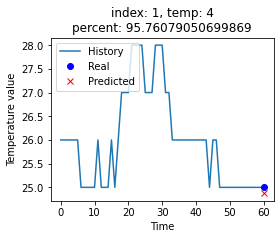

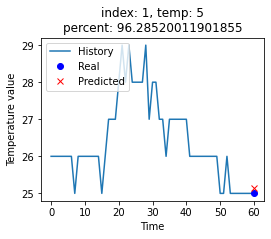

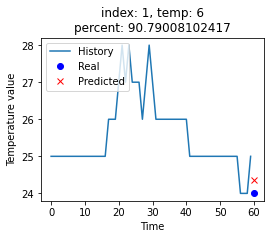

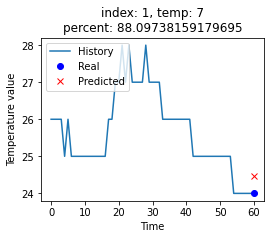

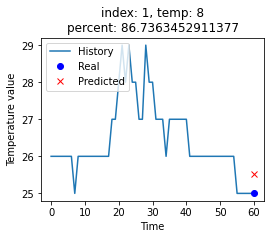

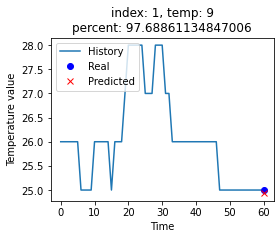

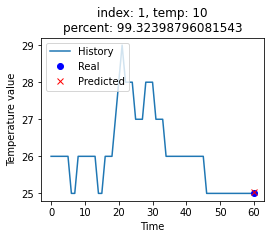

In [127]:
for i in range(2):
    pred_plot(scaler_x.inverse_transform(X_test[:i+1]),
              scaler_y.inverse_transform(y_test[:i+1]),
              scaler_y.inverse_transform(model.predict(X_test[:i+1])),
              i)

# Testing and Experiments

In [128]:
for i in range(5):
    print('test index:', i)
    true = scaler_x.inverse_transform(X_test[i:i+1])[0][(N_TIME - 1) * 10:(N_TIME - 1) * 10 + 10]
    print('True: ', true)

    ynew= model.predict(X_test)
    predict = scaler_y.inverse_transform(ynew[i:i+1])[0]
    print('Predicted: ', predict)

    result = []
    for j in range(len(true)):
        result.append([true[j], " - ", predict[j], " = ", abs(true[j] - predict[j])])
    
    for j in result:
        print(j)
    print("\n")

test index: 0
True:  [24. 23. 23. 23. 24. 23. 23. 24. 24. 24.]
Predicted:  [23.819496 23.031395 23.278017 23.494398 23.645506 23.01384  23.077675
 24.303614 23.591862 23.655743]
[24.000000000000004, ' - ', 23.819496, ' = ', 0.1805038452148473]
[23.0, ' - ', 23.031395, ' = ', 0.03139495849609375]
[23.0, ' - ', 23.278017, ' = ', 0.2780170440673828]
[23.0, ' - ', 23.494398, ' = ', 0.4943981170654297]
[24.000000000000004, ' - ', 23.645506, ' = ', 0.35449409484863637]
[23.0, ' - ', 23.01384, ' = ', 0.0138397216796875]
[23.0, ' - ', 23.077675, ' = ', 0.07767486572265625]
[24.0, ' - ', 24.303614, ' = ', 0.30361366271972656]
[24.0, ' - ', 23.591862, ' = ', 0.4081382751464844]
[24.0, ' - ', 23.655743, ' = ', 0.3442573547363281]


test index: 1
True:  [25. 25. 25. 25. 25. 25. 24. 25. 25. 25.]
Predicted:  [25.261215 24.505224 24.60499  24.872824 25.148592 24.368393 24.476105
 25.530546 24.930658 25.02704 ]
[25.0, ' - ', 25.261215, ' = ', 0.2612152099609375]
[25.0, ' - ', 24.505224, ' = ', 0.49477

# Visualizations

In [129]:
def plot_train_history(history, title):
  mpl.rcParams['figure.figsize'] = (8, 6)
  mpl.rcParams['axes.grid'] = False
    
  loss = history.history['loss']
  val_loss = history.history['val_loss']
    
  epochs = range(len(loss))

  y = []
  for i in epochs:
        y.append(0)

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.plot(epochs, y, 'g', label='y = 0 axis')
  plt.xlabel('Epochs')
  plt.ylabel('MSE value or Losses')
    
  plt.title(title)
  plt.legend()

  plt.show()

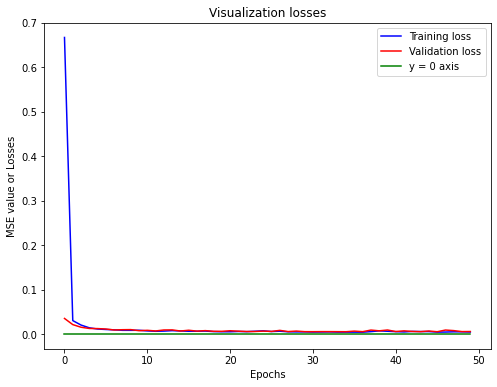

In [130]:
plot_train_history(fit,
                   'Visualization losses')